In [1]:
from medical_diffusion.models.embedders.latent_embedders import VAE

latent_embedder = VAE
latent_embedder_checkpoint = './runs/2023_08_08_195632 (AE no emb)/last.ckpt'


vae = latent_embedder.load_from_checkpoint(latent_embedder_checkpoint, time_embedder=None)

Lightning automatically upgraded your loaded checkpoint from v1.9.5 to v2.0.6. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file runs/2023_08_08_195632 (AE no emb)/last.ckpt`
/home/aghiles/anaconda3/envs/work/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aghiles/anaconda3/envs/work/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


In [1]:
import torch
x = torch.randn(4, 2, 128, 128)
x_hat = torch.randn(4, 2, 128, 128)

originals = torch.cat([
    torch.hstack([img for img in x[:, idx, ...]])
    for idx in range(x.shape[1])
], dim=0)

reconstructed = torch.cat([
    torch.hstack([img for img in x_hat[:, idx, ...]])
    for idx in range(x_hat.shape[1])
], dim=0)

img = torch.cat([originals, reconstructed], dim=0)
img.shape

torch.Size([512, 512])

In [1]:
import numpy as np

data = np.load('./data/brats_preprocessed.npy')

In [35]:
import torch

x = torch.randint(0, 2, size=(4, 4))

x

tensor([[0, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 1, 1]])

In [5]:
from modules.models.embedders.latent_embedders import VAEGAN
import torch

model = VAEGAN(
    in_channels     = 1, 
    out_channels    = 1, 
    emb_channels    = 2,
    spatial_dims    = 2,
    hid_chs         = [64, 128, 256, 512],
    deep_supervision = False,
    use_attention   = ['none', 'none', 'none', 'spatial'],
    start_gan_train_step = -1,
    embedding_loss_weight = 1e-6,
)

Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/aghiles/anaconda3/envs/work/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aghiles/anaconda3/envs/work/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
o = model(torch.randn(4, 1, 128, 128))
o[1]

[]

In [2]:
import numpy as np
data = np.load('./brats_preprocessed.npy', allow_pickle=True)
data = data[:, 0, None]
data = data.transpose(0, 4, 1, 2, 3) # depth first

norm = lambda data: (2 * data - data.min() - data.max()) / (data.max() - data.min())
for idx in range(data.shape[0]):
    data[idx] = norm(data[idx]).astype(np.float32)

data = data.reshape(-1, 1, 128, 128)

print(data.shape)
print(data.max(), data.min())

(64000, 1, 128, 128)
1.0 -1.0


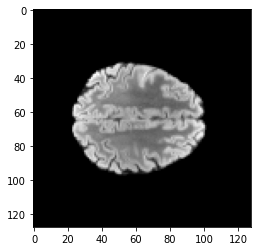

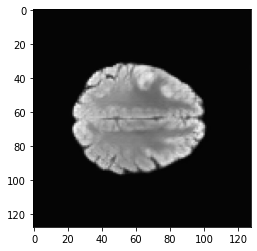

In [31]:
import matplotlib.pyplot as plt

idx = 300

# original
plt.imshow(data[idx, 0, :, :], cmap='gray')
plt.show()

import torch

x = torch.from_numpy(data[idx, None, :, :, :]).to('cuda', torch.float32)
recon, _, _ = vae(x)
plt.imshow(recon[0, 0].detach().cpu().numpy(), cmap='gray')

In [2]:
import torch
import numpy as np

from medical_diffusion.models.embedders.latent_embedders import VAE
from medical_diffusion.data.datamodules import SimpleDataModule

class IdentityDataset(torch.utils.data.Dataset):
    def __init__(self, *data):
        self.data = data

    def __len__(self):
        return self.data[-1].__len__()

    def __getitem__(self, index):
        return [d[index] for d in self.data]

: 

: 

In [1]:
import pytorch_lightning.utilities.cloud_io as plcloud

In [10]:
data = np.load('./brats_preprocessed.npy', allow_pickle=True)
data = data[:, 0, None, ..., 32]

norm = lambda data: (2 * data - data.min() - data.max()) / (data.max() - data.min())
for idx in range(data.shape[0]):
    data[idx] = norm(data[idx]).astype(np.float32)

dataset = IdentityDataset(data)

dm = SimpleDataModule(
    ds_train = dataset,
    batch_size=8, 
    num_workers=0,
    pin_memory=False
) 

In [17]:
import pytorch_lightning as pl

In [11]:
dm.prepare_data()
dm.setup(stage='train')

In [12]:
loader = dm.train_dataloader()

In [13]:
b = next(iter(loader))

\begin{table}[t]
\footnotesize
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{@{}clccccc@{}}
\toprule
\multicolumn{2}{c}{\multirow{2}{*}{Methods}} & \multicolumn{5}{c}{Number of training volumes} \\ \cmidrule(l){3-7} 
                         &                         & 10 & 20 & 30 & 40 & 50 \\ \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(lr){4-4} \cmidrule(lr){5-5} \cmidrule(lr){6-6} \cmidrule(l){7-7}
\multirow{3}{*}{BRATS}   & Reference               & 0.604$\pm$0.07 & 0.620$\pm$0.06 & 0.663$\pm$0.04 & 0.672$\pm$0.05 & 0.703$\pm$0.01 \\
                         & Ours ($\alpha = 0.01$)  & 0.790$\pm$0.01 & 0.818$\pm$0.01 & 0.842$\pm$0.01 & 0.808$\pm$0.02 & 0.821$\pm$0.01 \\ 
                         & Ours + Aug. ($\times$5) & \textbf{0.799$\pm$0.02} & \textbf{0.828$\pm$0.01} & \textbf{0.845$\pm$0.01} & \textbf{0.822$\pm$0.03} & \textbf{0.840$\pm$0.03} \\ \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(lr){4-4} \cmidrule(lr){5-5} \cmidrule(lr){6-6} \cmidrule(l){7-7}
\multirow{3}{*}{HECKTOR} & Reference               & 0.454$\pm$0.11  & 0.528$\pm$0.10  & 0.542$\pm$0.02  & 0.629$\pm$0.04  & 0.648$\pm$0.04  \\
                         & Ours ($\alpha = 0.01$)  & 0.596$\pm$0.04  & 0.622$\pm$0.04  & 0.672$\pm$0.01  & 0.679$\pm$0.01  & 0.688$\pm$0.03  \\
                         & Ours + Aug. ($\times$5) & \textbf{0.668$\pm$0.01}  & \textbf{0.627$\pm$0.03}  & \textbf{0.680$\pm$0.01} & \textbf{0.684$\pm$0.01} & \textbf{0.696$\pm$0.01}  \\ \bottomrule
\end{tabular}%
}
\caption{Quantitative performance of the our approach evaluated in terms of DSC (\%↑)  with respect to the base number of real volumes used for training. We also present an augmented variant of our approach in conjunction with standard augmentation methods, resulting in additional performance enhancement. \label{tab:volumes}}
\end{table}

\begin{table}[h]
\centering
\resizebox{8cm}{!}{
\begin{tabular}{@{}cccc@{}}
\toprule
\multicolumn{2}{c}{Methods}                                    & BRATS & HECKTOR \\ \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multicolumn{2}{c}{Reference}                                  & 0.663$\pm$0.04 & 0542$\pm$0.02       \\ \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multicolumn{2}{c}{Augmented ($\times$2)}                      & 0.786$\pm$0.01              & 0.563$\pm$0.04        \\
\multicolumn{2}{c}{Augmented ($\times$3)}                      & 0.798$\pm$0.01              & 0.587$\pm$0.13      \\
\multicolumn{2}{c}{Augmented ($\times$5)}                      & 0.810$\pm$0.01              & 0.658$\pm$0.14  \\ \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multirow{4}{*}{LSGAN}                  & + 500 synthetic  & 0.703$\pm$0.03 & 0.609$\pm$0.11 \\
                                        & + 1000 synthetic & 0.720$\pm$0.04 & 0.622$\pm$0.03 \\
                                        & + 1500 synthetic & 0.697$\pm$0.03 & 0.617$\pm$0.03 \\
                                        & + 2000 synthetic & 0.676$\pm$0.06 & 0570$\pm$0.02  \\
                                        \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multirow{4}{*}{VAE}                    & + 500 synthetic  & 0.740$\pm$0.08 & 0.584$\pm$0.02 \\
                                        & + 1000 synthetic & 0.773$\pm$0.04 & 0.595$\pm$0.02 \\
                                        & + 1500 synthetic & 0.752$\pm$0.03 & 0.570$\pm$0.02 \\
                                        & + 2000 synthetic & 0.704$\pm$0.06 & 0.563$\pm$0.10 \\ 
                                        \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multirow{4}{*}{HVAE}                   & + 500 synthetic  & 0.749$\pm$0.06 & 0.586$\pm$0.01 \\
                                        & + 1000 synthetic & 0.760$\pm$0.07 & 0.614$\pm$0.04 \\
                                        & + 1500 synthetic & 0.778$\pm$0.02 & 0.592$\pm$0.03 \\
                                        & + 2000 synthetic & 0.763$\pm$0.05 & 0.599$\pm$0.10 \\ 
                                        \cmidrule(r){1-2} \cmidrule(lr){3-3} \cmidrule(l){4-4}
\multirow{4}{*}{Ours ($\alpha = 0.01$)} & + 500 synthetic  & 0.763$\pm$0.04 & 0.670$\pm$0.02 \\
                                        & + 1000 synthetic & 0.789$\pm$0.02 & \textbf{0.672$\pm$0.01} \\
                                        & + 1500 synthetic & 0.816$\pm$0.04 & 0.637$\pm$0.01 \\
                                        & + 2000 synthetic & \textbf{0.844$\pm$0.01} & 0.607$\pm$0.03 \\ 
                                        \bottomrule
\end{tabular}%
}
\caption{Quantitative performance of the generative models is evaluated in terms of DSC (\%↑) on BRATS and HECKTOR. \label{tab:dice}}
\end{table}
